In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats

## Load the data

In [2]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Data Cleaning

In [3]:
# check whether there is any na value
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

Text(0.5, 1.0, 'Before removing extreme values (outliers)')

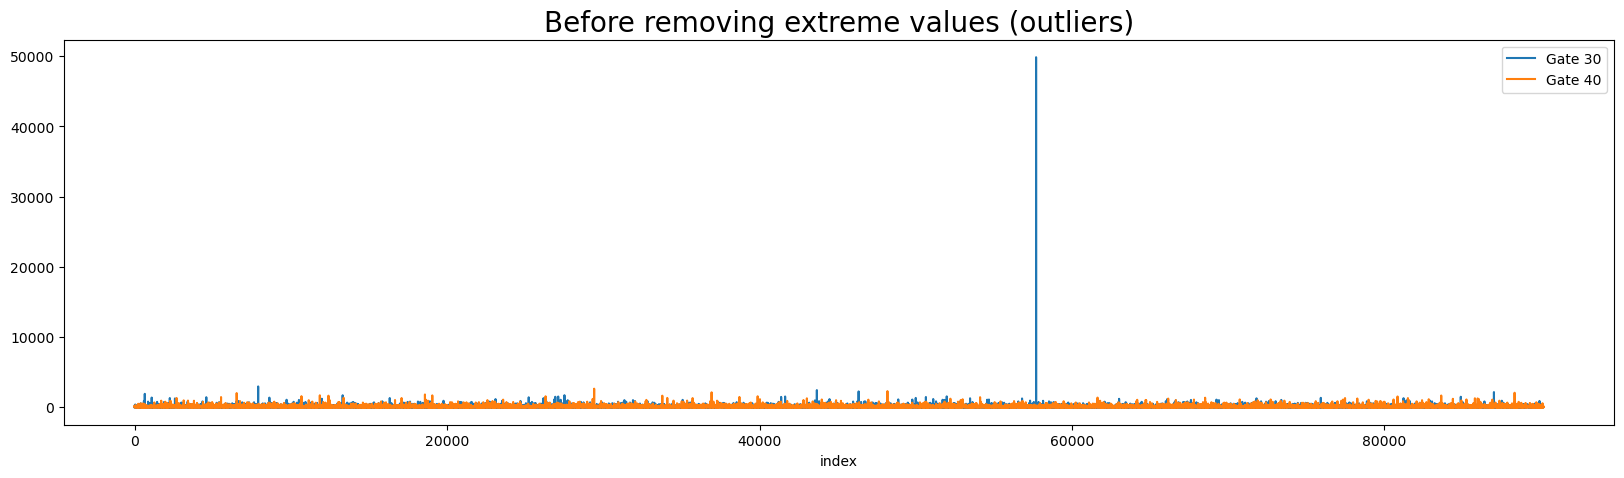

In [4]:
df_gate30 = df[df.version == 'gate_30']
df_gate40 = df[df.version == 'gate_40']

# check ouliers
df_gate30.reset_index().set_index('index').sum_gamerounds.plot(legend = True, label = 'Gate 30', figsize = (20, 5))
df_gate40.reset_index().set_index('index').sum_gamerounds.plot(legend = True, label = 'Gate 40', figsize = (20, 5))
plt.title('Before removing extreme values (outliers)', size = 20)

Text(0.5, 1.0, 'After removing extreme values (outliers)')

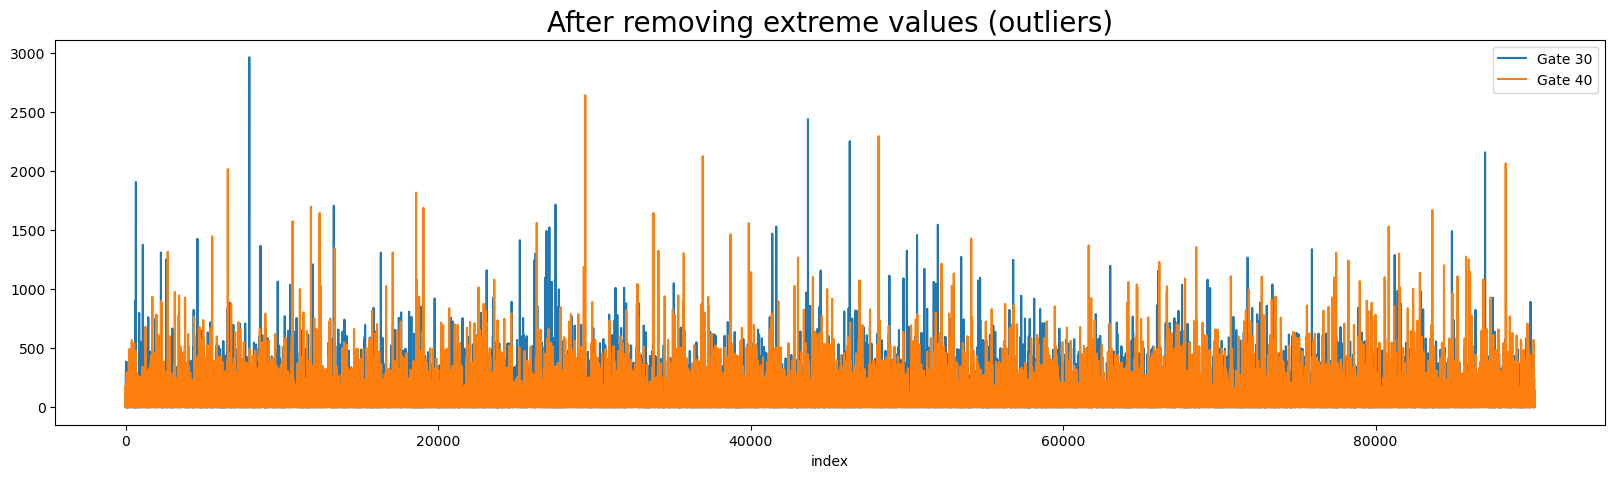

In [5]:
# remove the extreme value
df_gate30 = df_gate30[df_gate30.sum_gamerounds < df_gate30.sum_gamerounds.max()]
df = df[df.sum_gamerounds < df.sum_gamerounds.max()]

df_gate30.reset_index().set_index('index').sum_gamerounds.plot(legend = True, label = 'Gate 30', figsize = (20, 5))
df_gate40.reset_index().set_index('index').sum_gamerounds.plot(legend = True, label = 'Gate 40', figsize = (20, 5))
plt.title('After removing extreme values (outliers)', size = 20)

## Data Exploration

In [6]:
df.shape

(90188, 5)

In [7]:
df.describe()

,userid,sum_gamerounds
count,9.018800e+04,90188.000000
mean,4.998397e+06,51.320253
std,2.883298e+06,102.682719
min,1.160000e+02,0.000000
25%,2.512211e+06,5.000000
50%,4.995804e+06,16.000000
75%,7.496461e+06,51.000000
max,9.999861e+06,2961.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90188 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90188 non-null  int64 
 1   version         90188 non-null  object
 2   sum_gamerounds  90188 non-null  int64 
 3   retention_1     90188 non-null  bool  
 4   retention_7     90188 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.9+ MB


In [9]:
df.nunique()

userid            90188
version               2
sum_gamerounds      941
retention_1           2
retention_7           2
dtype: int64

In [10]:
# print unique values for version
df.version.unique()

array(['gate_30', 'gate_40'], dtype=object)

Text(0.5, 1.0, 'Distribution for treatment group')

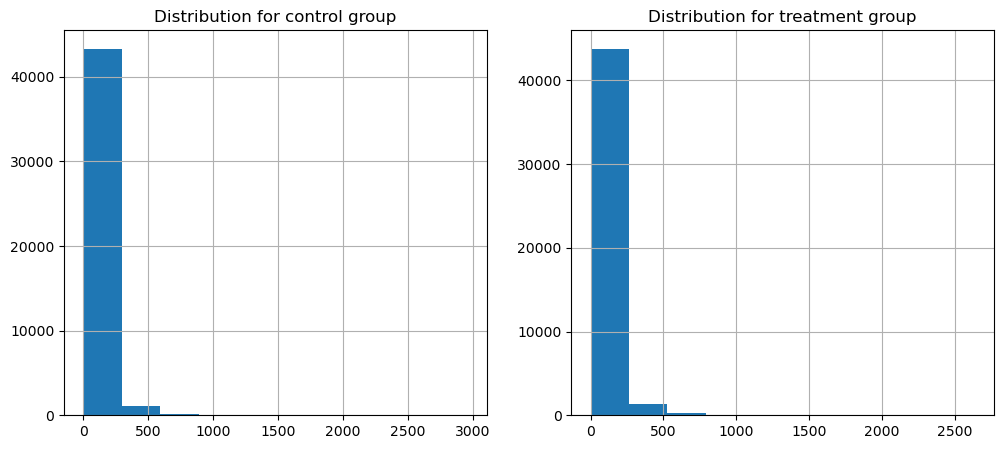

In [55]:
# check the distribution of control group and treatment group
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
plt.subplot(1, 2, 1)
df_gate30['sum_gamerounds'].hist(ax = ax[0])
plt.title('Distribution for control group')

plt.subplot(1, 2, 2)
df_gate40['sum_gamerounds'].hist(ax = ax[1])
plt.title('Distribution for treatment group')

Text(0.5, 1.0, 'The Distribution for User Counts vs First 100 Sum of Game Rounds')

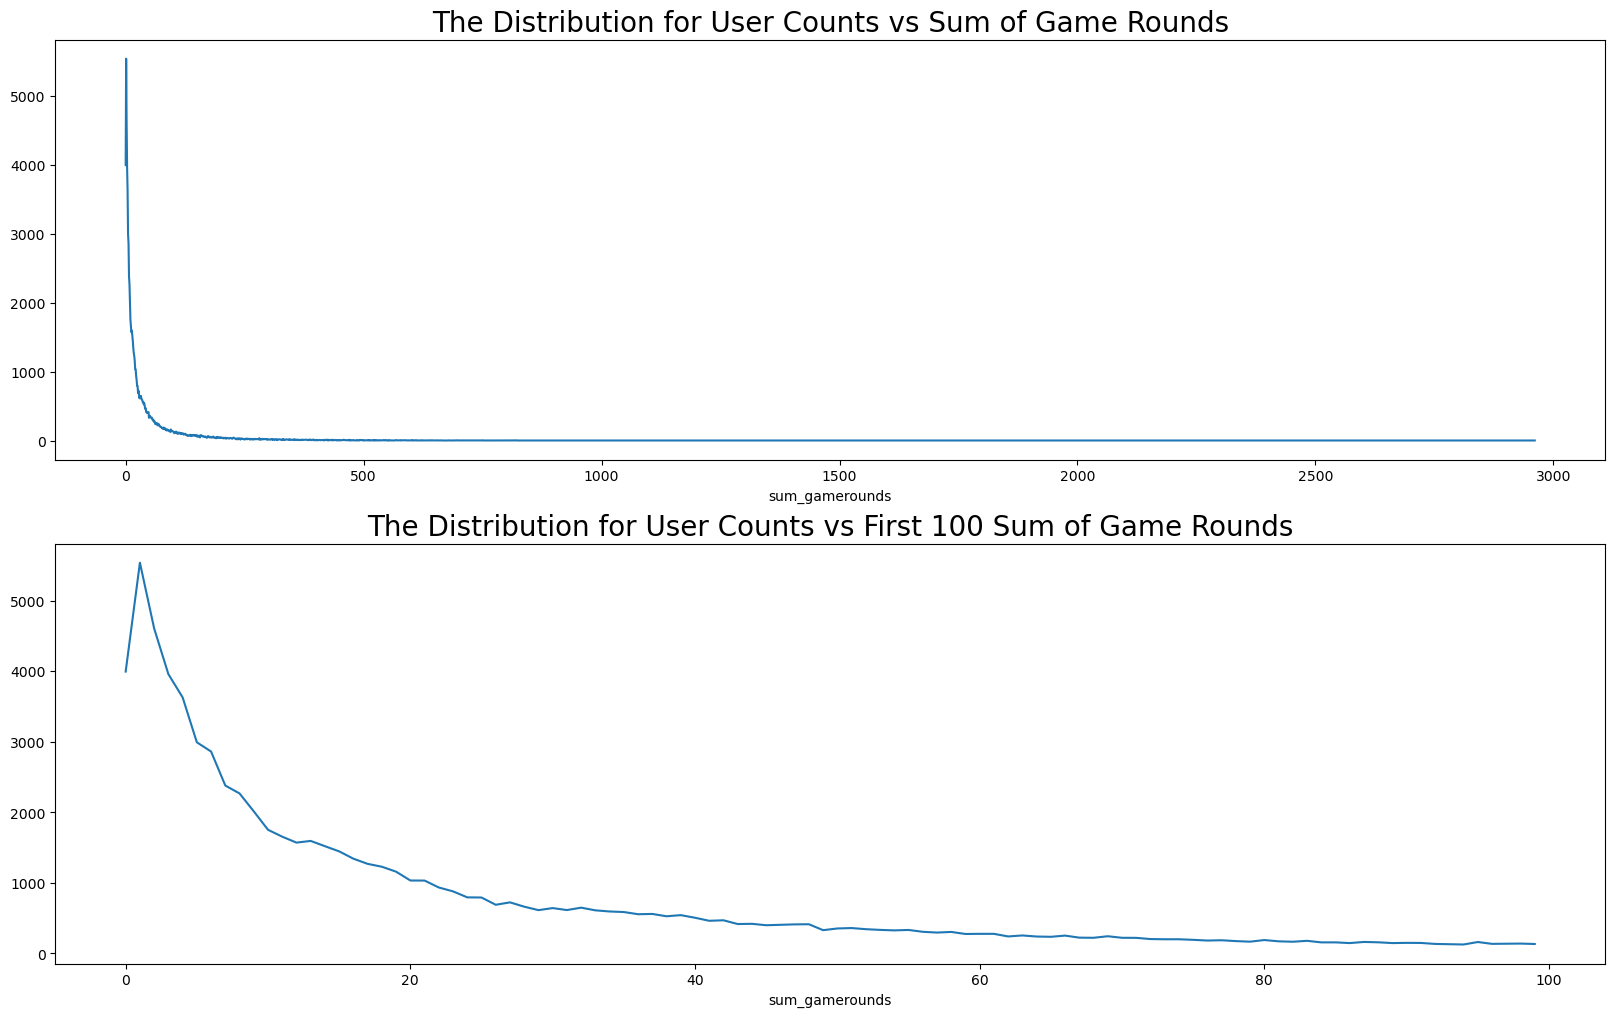

In [22]:
# number of users vs sum of game rounds
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 12))
plt.subplot(2, 1, 1)
df.groupby('sum_gamerounds').userid.count().plot()
plt.title('The Distribution for User Counts vs Sum of Game Rounds', size = 20)

plt.subplot(2, 1, 2)
df.groupby('sum_gamerounds').userid.count()[:100].plot()
plt.title('The Distribution for User Counts vs First 100 Sum of Game Rounds', size = 20)

Text(0.5, 1.0, 'User Counts vs Version over 40 Game Rounds')

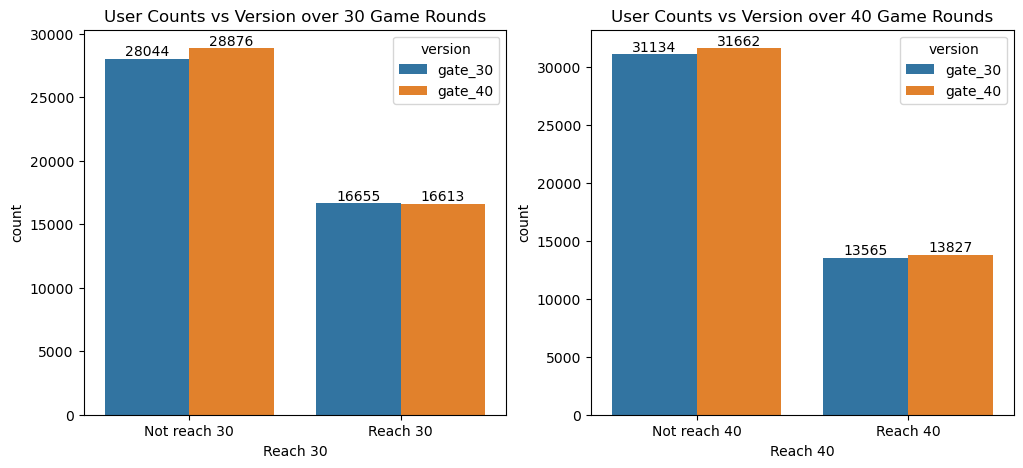

In [59]:
df['Reach 30'] = df['sum_gamerounds'].apply(lambda x : 'Reach 30' if x >= 30 else 'Not reach 30')
df['Reach 40'] = df['sum_gamerounds'].apply(lambda x : 'Reach 40' if x >= 40 else 'Not reach 40')

# number of users vs version
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Reach 30', hue = 'version', data = df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('User Counts vs Version over 30 Game Rounds')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = 'Reach 40', hue = 'version', data = df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('User Counts vs Version over 40 Game Rounds')

Text(0.5, 1.0, 'User Counts vs Retention 7')

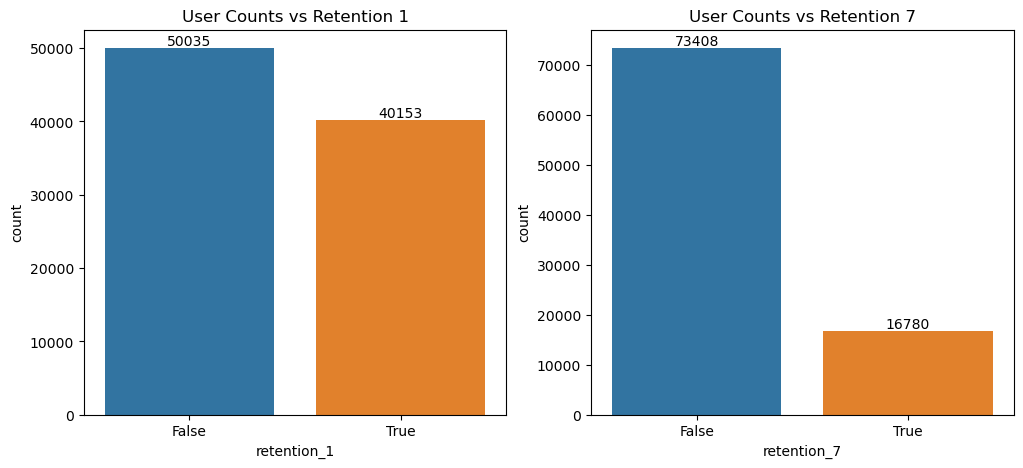

In [62]:
# number of users vs retention
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'retention_1', data = df)
ax.bar_label(ax.containers[0])
plt.title('User Counts vs Retention 1')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = 'retention_7', data = df)
ax.bar_label(ax.containers[0])
plt.title('User Counts vs Retention 7')

In [68]:
# summary based on retention
df['Retention'] = list(map(lambda x, y: str(x) + "-" + str(y), df.retention_1, df.retention_7))
df.groupby(['version', 'Retention']).sum_gamerounds.agg(['count', 'median', 'mean', 'std', 'max']).reset_index()

,version,Retention,count,median,mean,std,max
0,gate_30,False-False,22840,6.0,11.819746,21.642643,981
1,gate_30,False-True,1825,43.0,73.169315,93.222330,1072
2,gate_30,True-False,13358,33.0,49.694490,58.125396,918
3,gate_30,True-True,6676,127.0,183.886309,189.626390,2961
4,gate_40,False-False,23597,6.0,11.913294,20.901020,547
5,gate_40,False-True,1773,47.0,75.261139,94.478048,1241
6,gate_40,True-False,13613,32.0,50.025490,60.924587,2640
7,gate_40,True-True,6506,133.0,190.282355,194.220077,2294


## A/B Testing

In [69]:
# define A & B groups
df['version'] = np.where(df['version'] == 'gate_30', 'A', 'B')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Reach 30,Reach 40,Retention
0,116,A,3,False,False,Not reach 30,Not reach 40,False-False
1,337,A,38,True,False,Reach 30,Not reach 40,True-False
2,377,B,165,True,False,Reach 30,Reach 40,True-False
3,483,B,1,False,False,Not reach 30,Not reach 40,False-False
4,488,B,179,True,True,Reach 30,Reach 40,True-True


In [95]:
# define A/B testing function
def ABtesting(dataframe, group, target, standard):
    groupA = df[df[group] == 'A'][target]
    groupB = df[df[group] == 'B'][target]
    # check normal distribution 
    # True: Reject H0. Distribution is not normal.
    # False: Not reject H0. Distribution is normal.
    ntA = shapiro(groupA)[1] < standard
    ntB = shapiro(groupB)[1] < standard
    
    # check constant variance (True: Reject)
    # True: Reject H0. Not constant variance.
    # False: Not reject H0. Constant variance.
    leveneTest = stats.levene(groupA, groupB)[1] < standard
    
    if (ntA == False) & (ntB == False):
        if leveneTest == False:
            # normal & constant variance
            ttest = stats.ttest_ind(groupA, groupB, equal_var = True)[1]
        else:
            # normal & non-constant variance
            ttest = stats.ttest_ind(groupA, groupB, equal_var = False)[1]
    else:
        # non-parametric (non-normal)
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
    
    result = pd.DataFrame({'p-value':[ttest], 'test result' : [ttest < 0.05]})
    result['test type'] = np.where((ntA == False) & (ntB == False), 'Parametric', 'Non-parametric')
    result['test result'] = np.where(result['test result'] == False, 'Fail to reject H0.', 'Reject H0.')
    result['summary'] = np.where(result['test result'] == False, 'A/B groups are not similar.', 
                                 'A/B group are similar.')
    
    result = result[['test type', 'p-value', 'test result', 'summary']]
    return result

In [96]:
ABtesting(dataframe = df, group = 'version', target = 'sum_gamerounds', standard = 0.05)

/Users/vivianwu/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,test type,p-value,test result,summary
0,Non-parametric,0.050892,Fail to reject H0.,A/B group are similar.
